In [133]:
import math
import matplotlib.pyplot as plt

from tqdm import tqdm
from functools import reduce

from sklearn import datasets
from sklearn.preprocessing import normalize

In [134]:
anchors = [
[-0.03066219, -0.01265044],
[-0.0120358,  -0.04220275],
[ 0.02112345, -0.00502121],
[-0.05077007, -0.01954621],
[-0.01958132, -0.04417754],
[ 0.0302302,  -0.00367059],
[ 0.02769554, -0.0045546 ],
[-0.00722315, -0.04347651],
[-0.00721249, -0.04286618],
[-0.04756446, -0.01304867]]

features, labels = datasets.make_blobs(n_samples=1500, random_state=2)

In [135]:
def determine_center(features, labels, index):
    h_center = [2, -2]
    v_center = [2, -2]

    for i in range(len(labels)):
        if y[i] == index:
            if (features[i][0] < h_center[0]):
                h_center[0] = features[i][0]
            if (features[i][0] > h_center[1]):
                h_center[1] = features[i][0]
            if (features[i][1] < v_center[0]):
                v_center[0] = features[i][1]
            if (features[i][1] > v_center[1]):
                v_center[1] = features[i][1]

    return [(h_center[0] + h_center[1]) / 2, (v_center[0] + v_center[1]) / 2]

def draw(features, labels, centers = None):
    colors = ["green", "orange", "cyan"]
    color_set = set(labels)

    for i in range(len(labels)):
        plt.scatter(features[i][0], features[i][1], c=colors[labels[i]])

    if centers is not None:
        for center in centers:
            plt.scatter(center[1][0], center[1][1], c="black")

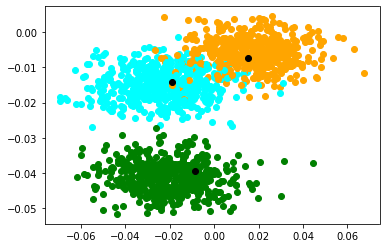

In [136]:
x = normalize(features.T).T
y = labels

centers = []
for i in range(3):
    centers += [[i, determine_center(x, y, i)]]

draw(x, y, centers)

In [137]:
def KMeans(centers):
    classes = [0 for _ in range(y.shape[0])]

    for iteration in tqdm(range(50)): # Вычисляем ближайший центроид
        for i in range(x.shape[0]):
            actual = centers[0][0]
            minimum = 1000000

            for center in centers:
                r = math.sqrt(sum((x[i] - center[1]) ** 2))

                if not (r >= minimum):
                    minimum = r
                    actual = center[0]

            classes[i] = actual

        for j in range(len(centers)): # Смещаем центроиды
            total = []

            for i in range(y.shape[0]):
                if classes[i] == centers[j][0]:
                    total.append(x[i])

            mean = reduce(lambda a, b: a + b, total) / len(total)
            centers[j][1] = mean

    return classes

100%|██████████| 50/50 [00:00<00:00, 87.25it/s]


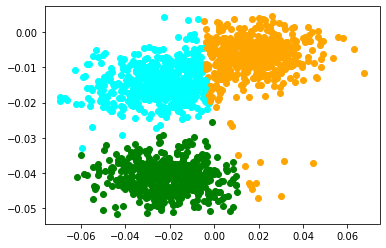

In [139]:
res = KMeans(centers)
draw(x, res)

In [140]:
def count_metric(num):
    centroids = []

    for j in range(num):
        centroids.append([j + 1, anchors[j]])

    return KMeans(centroids)

## Rand Index Metric

In [147]:
def RandIndex(correct, predictions):
    TP, TN, FP, FN = 0, 0, 0, 0

    for i in range(y.shape[0]):
        for j in range(0, y.shape[0]):
            if (j > i):
                if (correct[i] != correct[j]):
                    if (predictions[i] == predictions[j]):
                        TN += 1
                    else:
                        FN += 1
                else:
                    if (predictions[i] == predictions[j]):
                        TP += 1
                    else:
                        FP += 1

    return (TP + FN) / (TP + TN + FP + FN)

100%|██████████| 50/50 [00:01<00:00, 35.94it/s]


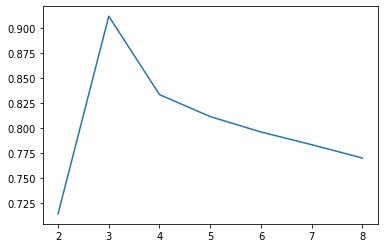

In [148]:
x_plot = []
y_plot = []

for i in range(2, 9):
    x_plot.append(i)
    y_plot.append(RandIndex(y, count_metric(i)))

plt.plot(x_plot, y_plot)

## Dunn Metric

In [141]:
def DunnMetrics(classes, y, x):
    den = 1e-30

    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if (classes[i] == classes[j]):
                dist = math.sqrt(sum((x[i] - x[j]) ** 2))
                if (dist > den):
                    den = dist

    num = 1    
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if (classes[i] != classes[j]):
                dist = math.sqrt(sum((x[i] - x[j]) ** 2))
                if (dist != 0 and dist < num):
                    num = dist

    return num / den

100%|██████████| 50/50 [00:01<00:00, 35.56it/s]


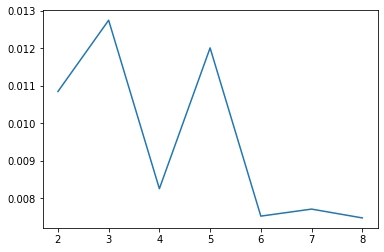

In [142]:
x_plot = []
y_plot = []

for i in range(2, 9):
    x_plot.append(i)
    y_plot.append(DunnMetrics(count_metric(i), y, x))

plt.plot(x_plot, y_plot)